In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline 

In [5]:
df = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Machine_Learning/Machine Learning/ID3 and Random Forest/Project/project.csv')

# Info of the dataset 
df.info()

print('\n \n')
# Head of the dataset 
print('The head of the dataset is: ' + '\n \n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

 

The head of the dataset is: 
 



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# To check the credit.policy column 
df['credit.policy']

0       1
1       1
2       1
3       1
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: credit.policy, Length: 9578, dtype: int64

Text(0.5, 0, 'FICO')

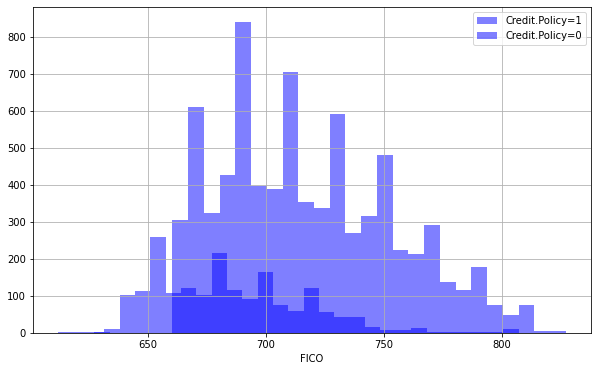

In [7]:
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

In [8]:
# To check the credit.policy column
df['not.fully.paid']

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

Text(0.5, 0, 'Not Fully Paid')

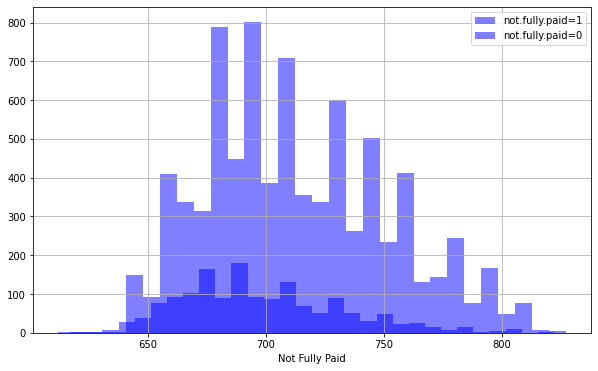

In [9]:
# Create a histogram of two FICO distributions on top of each other, one for each not.fully.paid outcome.
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('Not Fully Paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

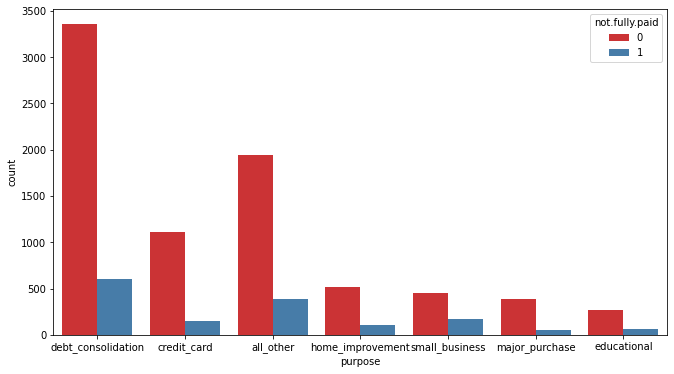

In [12]:
# Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
plt.figure(figsize=(11,6))
sns.countplot(data=df,x='purpose',hue='not.fully.paid',palette='Set1')

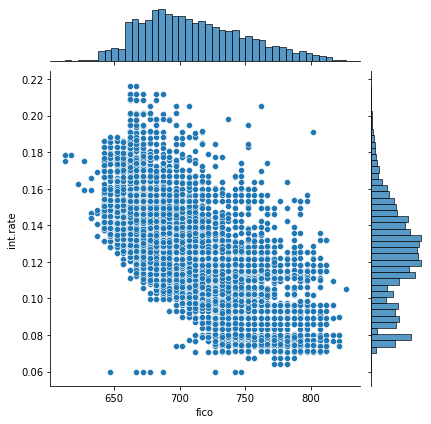

In [13]:
# Let's see the trend between FICO score and interest rate using jointplot.
sns.jointplot(data=df,x='fico',y='int.rate')

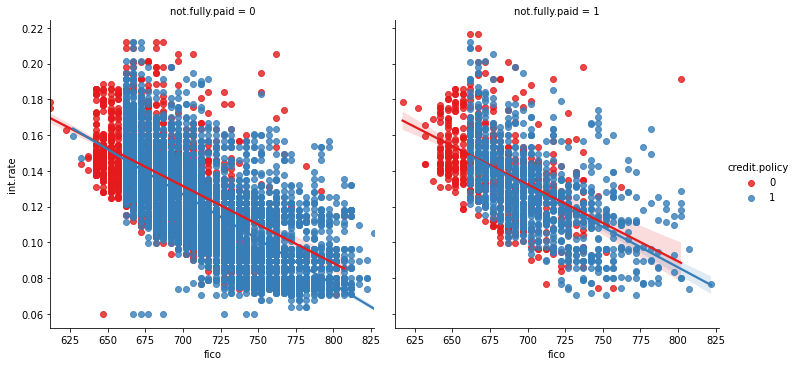

In [14]:
# Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy
sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',palette='Set1')

In [15]:
################################################################ Setting up data ##########################################################

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [18]:
# Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.
cat_feats = ['purpose']
cat_feats

['purpose']

In [20]:
# To create a dummy variable for categorical data 
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [28]:
# Train Test Split

# My target class is not.fully.paid
# Considering the variable class
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
# Create an instance of DecisionTreeClassifier()

dt = DecisionTreeClassifier()

# To fit the model 
dt.fit(X_train,y_train)

# To predict the model 
pre = dt.predict(X_test)

In [35]:
# Create an instance of RandomForestClassifier()

rf = RandomForestClassifier(n_estimators=300)

# To fit the model 
rf.fit(X_train,y_train)

# To predict the model 
pre1 = rf.predict(X_test)

In [37]:
# To compare and create Classification report and Confusion Matrix 

# Confusion Matrix for DT
print('The confusion matrix for DT is: ' + '\n \n',confusion_matrix(y_test,pre))

print('\n')

# Classification Report for DT 
print('The classification report for DT is: ' + '\n',classification_report(y_test,pre))

# Confusion Matrix for RF
print('The confusion matrix for RF is: ' + '\n \n',confusion_matrix(y_test,pre1))

print('\n')

# Classification Report for RF 
print('The classification report for RF is: ' + '\n \n',classification_report(y_test,pre1))

The confusion matrix for DT is: 
 
 [[1991  440]
 [ 337  106]]


The classification report for DT is: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

The confusion matrix for RF is: 
 
 [[2426    5]
 [ 434    9]]


The classification report for RF is: 
 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.64      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.75      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874

